# Demo  Mémoire GOHOUEDE Aimé

### Nous allons essayer de predire des bons des mauvais payeurs

Source de donnée:datahack.analyticsvidhya.com
Variables :
1. Gender
2. Education
3. Marrital status
4. Loand Amount
5. Credit History
6. Account Balance
7. Property Area
8. Credit History
9. Dependants
10. Self Employment Status



In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

In [2]:
## Pandas
## Numpy
## SKlearn
## Matplotlib
#https://www.markovml.com/blog/lime-vs-shap#:~:text=While%20LIME%20excels%20in%20localized,comprehensive%20global%20and%20local%20perspectives.
#https://www.datacamp.com/tutorial/explainable-ai-understanding-and-trusting-machine-learning-models#rdl

In [3]:
#importer nos données
train=pd.read_csv('Loan_Data/train.csv')
train.Loan_Status=train.Loan_Status.map({'Y':1,'N':0})

In [4]:
trainx =train.select_dtypes(exclude=["object"])

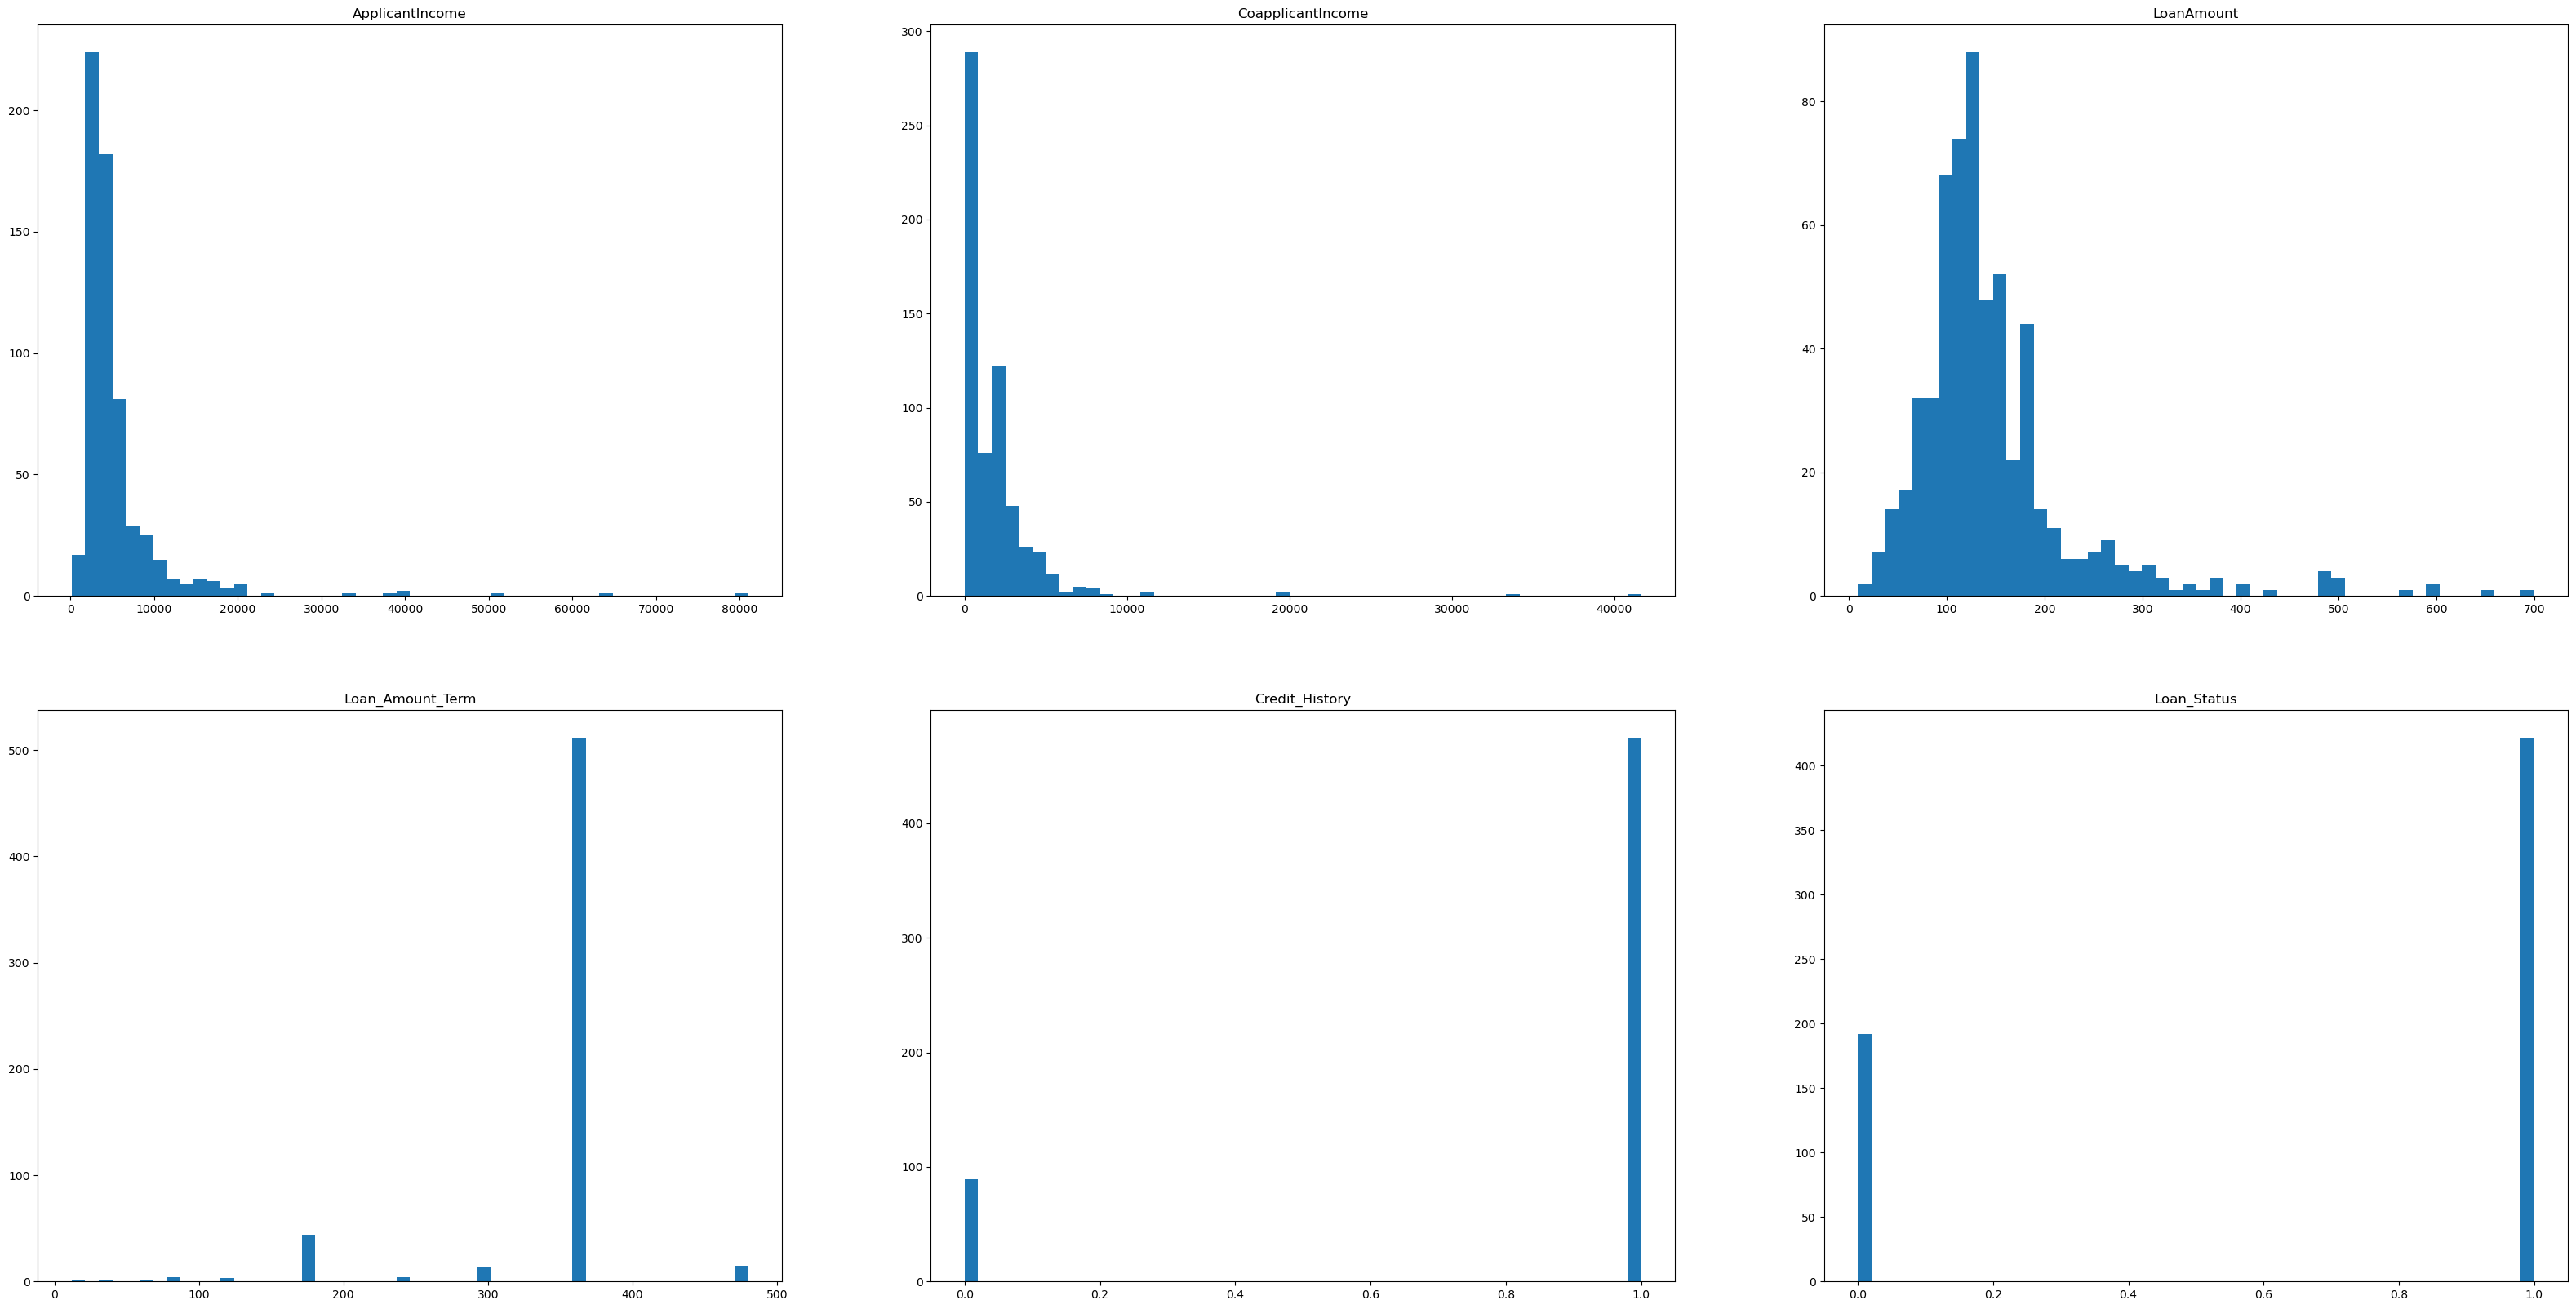

In [5]:
# Visualisation de la distribution des variables
fig, axs = plt.subplots(2, 3, figsize=(40, 20))
axs = axs.ravel()

for i, column in enumerate(trainx.columns):
    axs[i].hist(train[column], bins=50)
    axs[i].set_title(column)

plt.show()

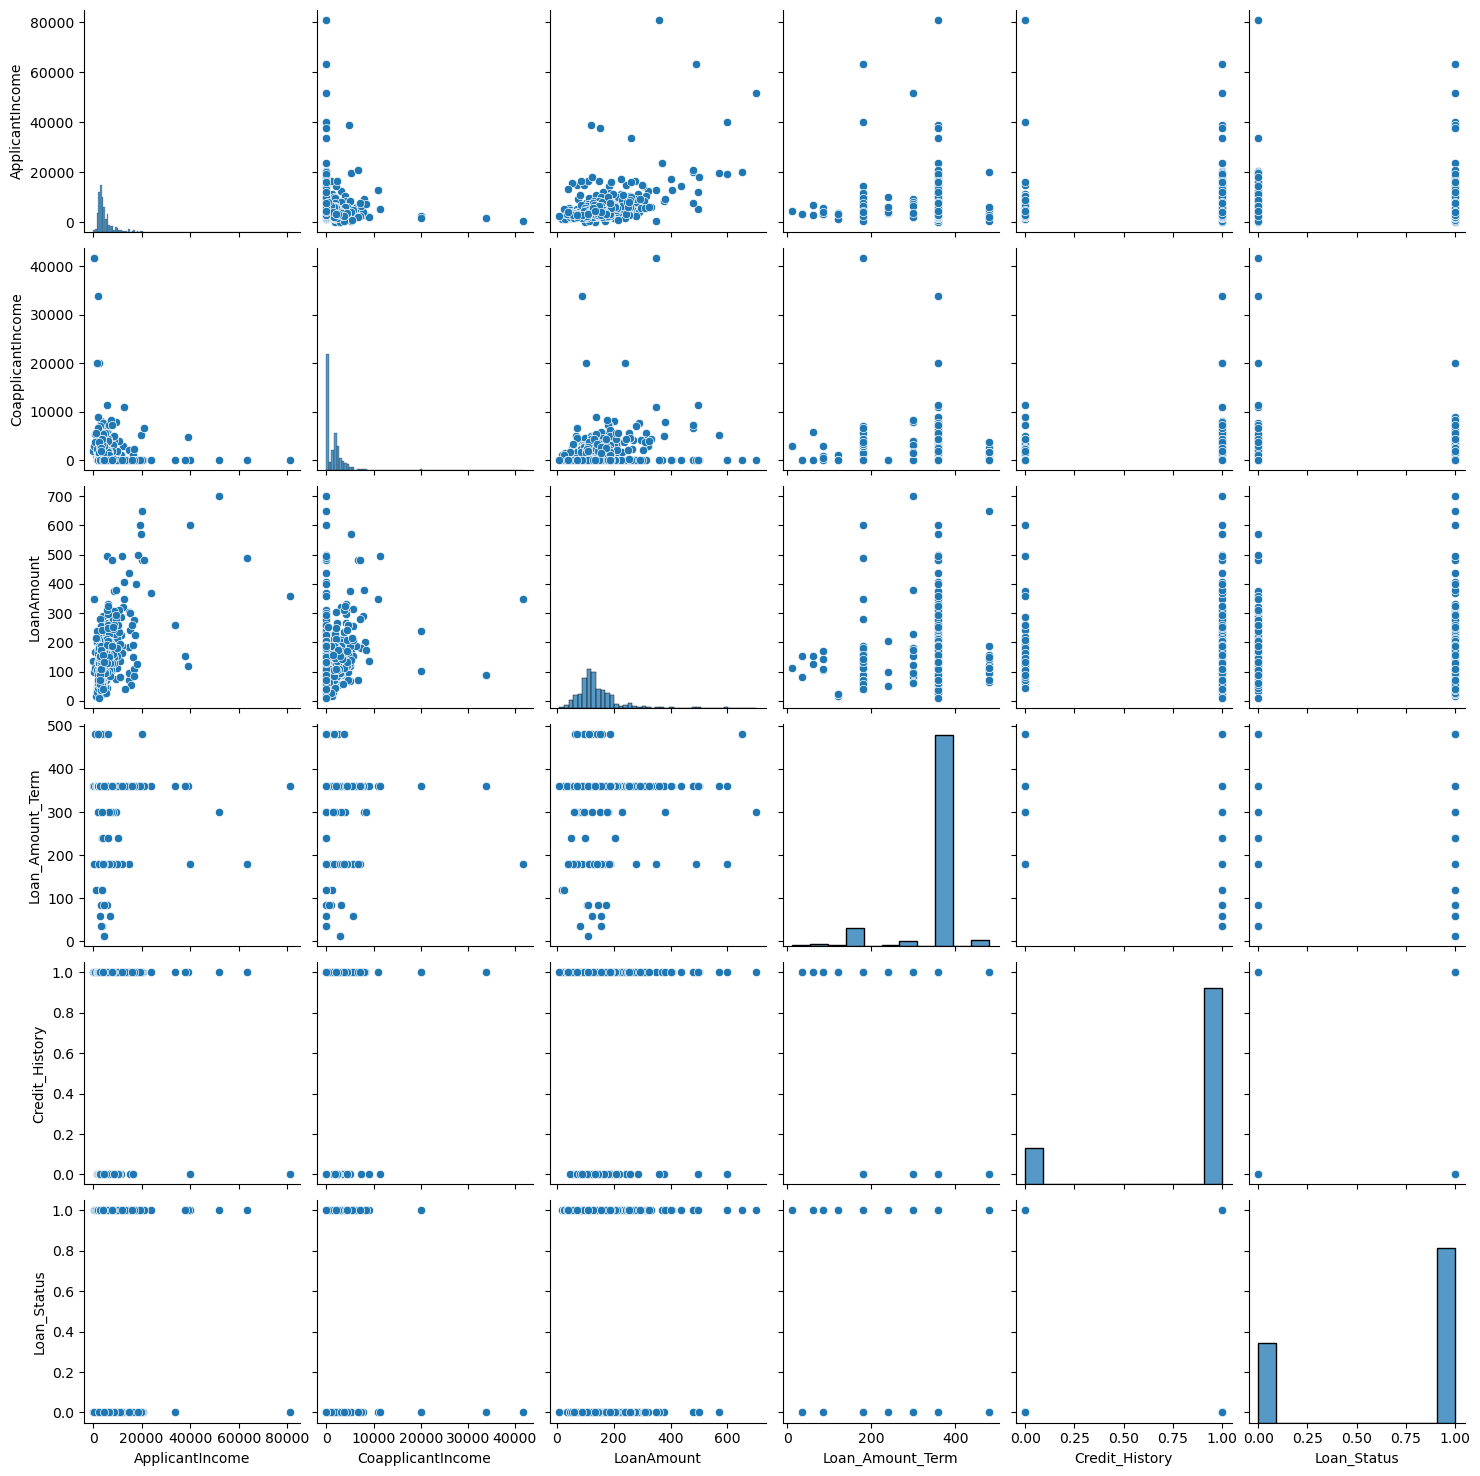

In [6]:
sns.pairplot(train)

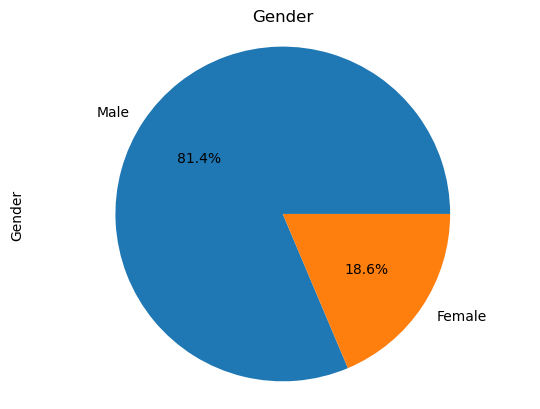

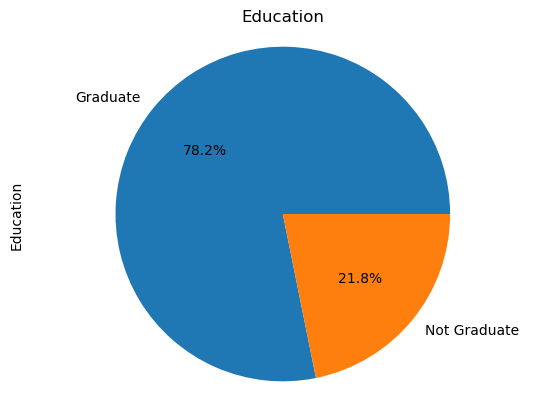

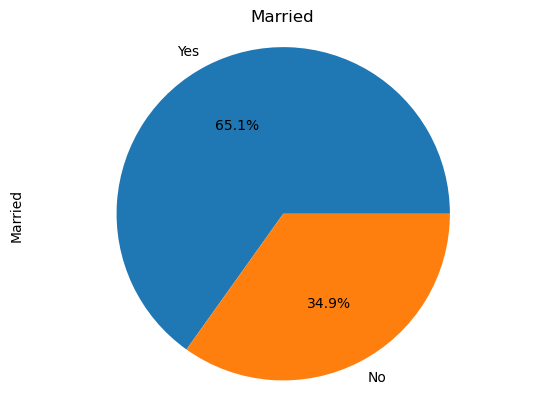

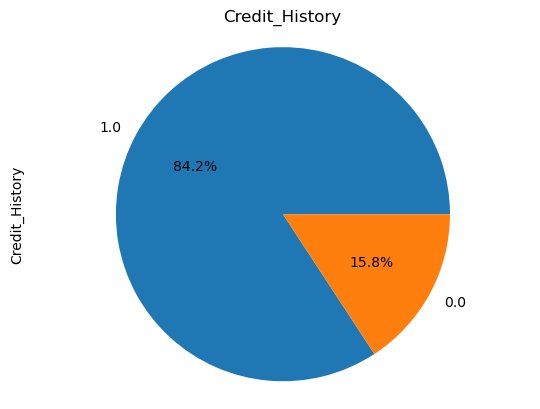

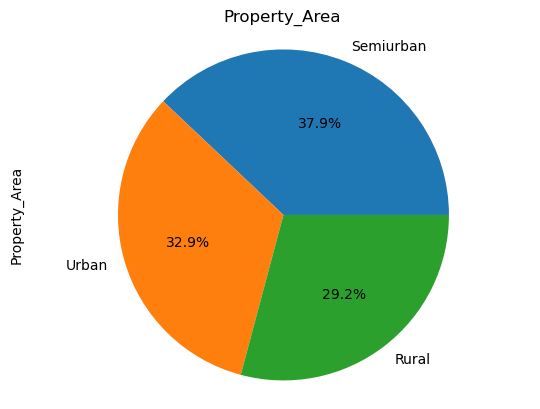

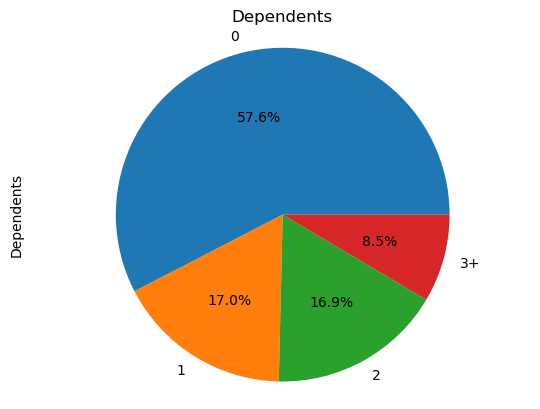

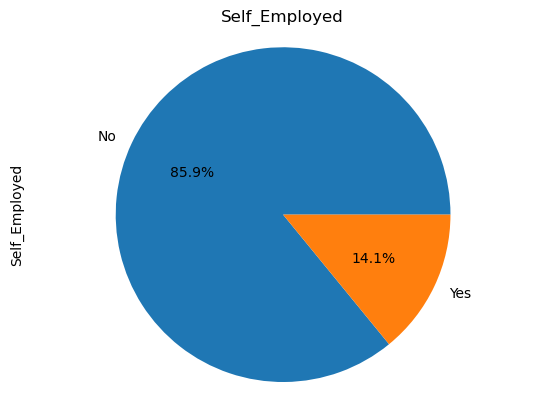

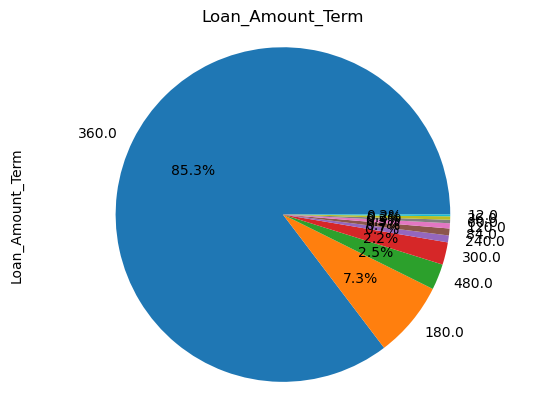

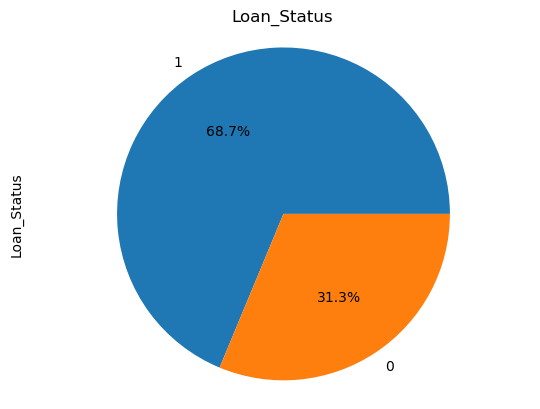

In [7]:
cat=["Gender",
"Education",
"Married",
"Credit_History",
"Property_Area",
"Dependents",
"Self_Employed",
"Loan_Amount_Term",
"Loan_Status"
    ]
for var in cat :
    train[var].value_counts().plot(kind='pie',autopct='%1.1f%%')
    plt.title(var)
    plt.axis('equal')
    plt.show()

In [8]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


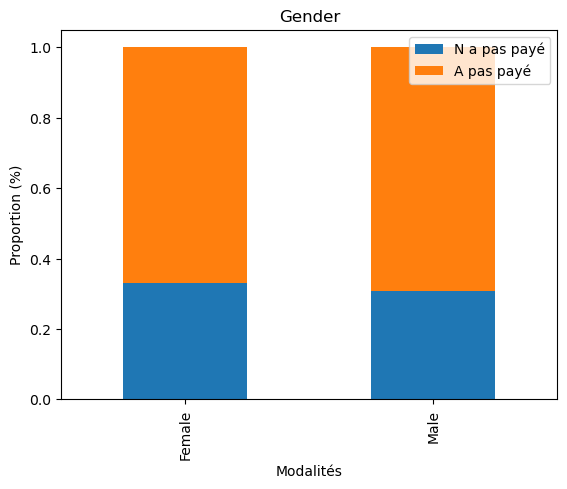

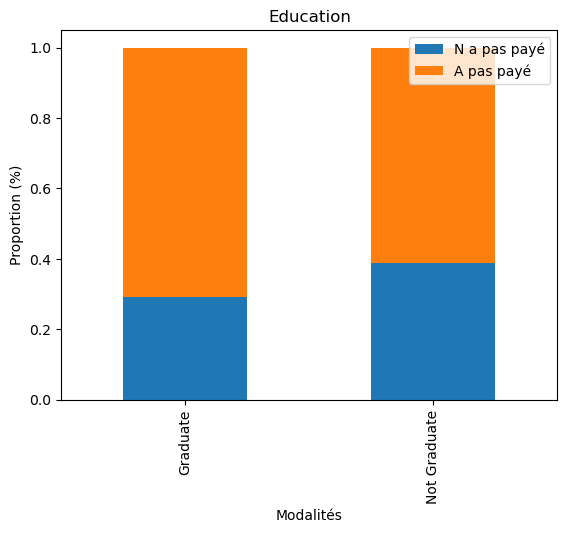

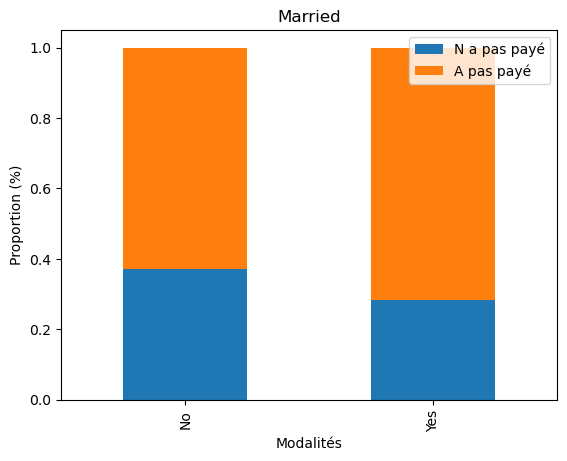

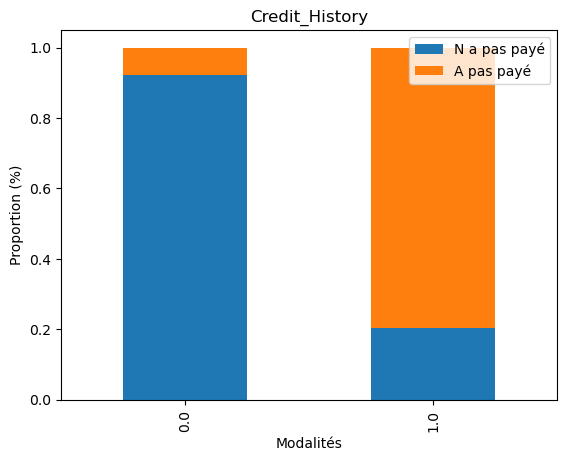

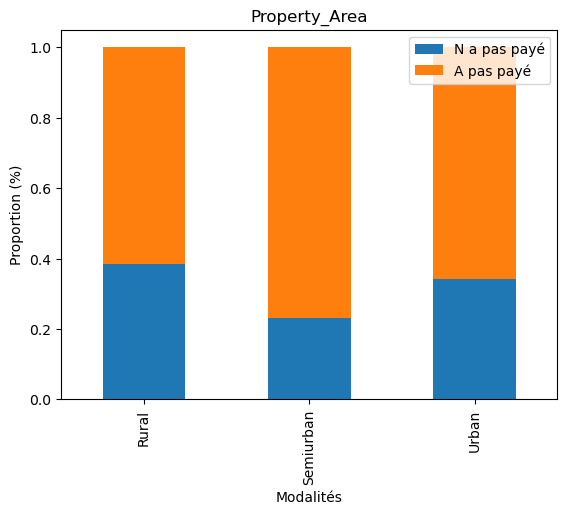

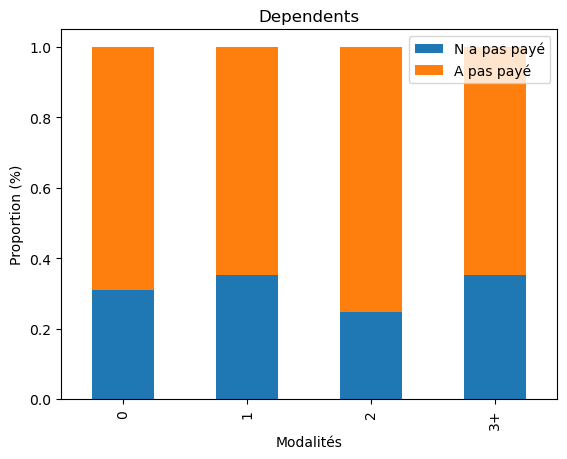

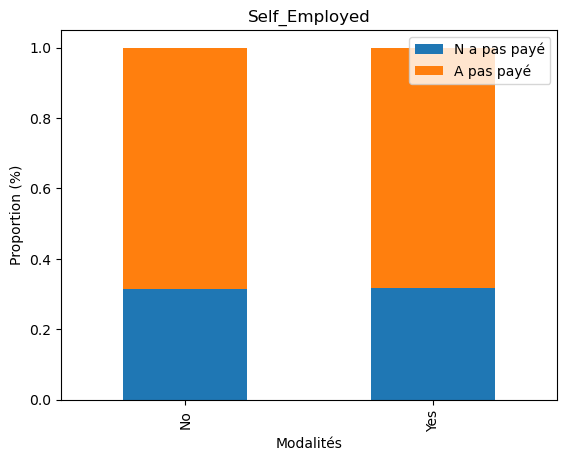

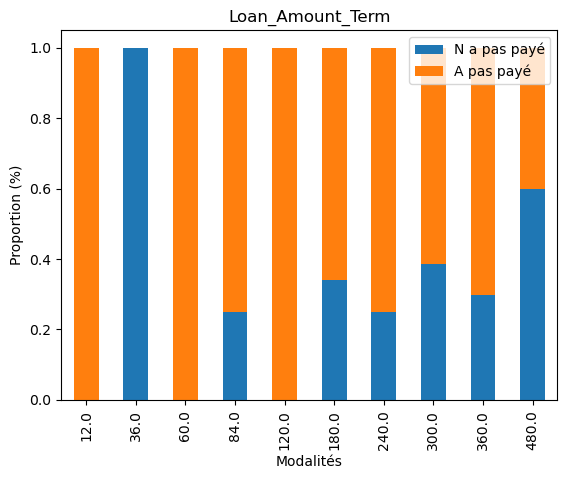

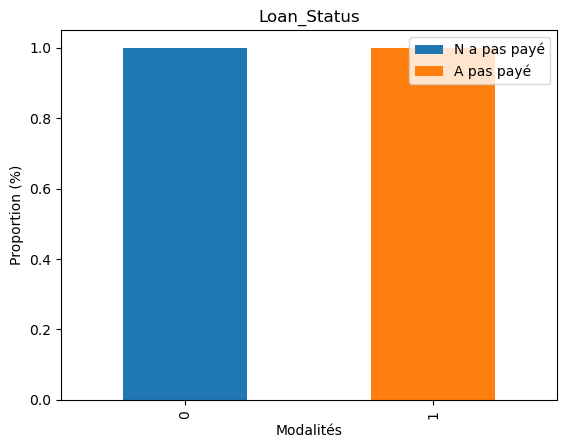

In [9]:

# Générer un bar plot pour chaque variable catégorielle
for var in cat:
    figsize = (20, 20)
    (train.groupby([var, 'Loan_Status'])['Loan_Status'].count()/train.groupby([var])[var].count()).unstack(level=1).plot(kind='bar', stacked=True)
    plt.title(var)
    plt.xlabel('Modalités')
    plt.ylabel('Proportion (%)')
    plt.legend(['N a pas payé', 'A pas payé'])
    plt.show()

##  Détectons Valeurs manquantes

In [10]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
trainx.dtypes

ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Loan_Status            int64
dtype: object

In [12]:
cats=[
"ApplicantIncome" ,     
"CoapplicantIncome",   
"LoanAmount"  ,        
"Loan_Amount_Term"  ]
import scipy.stats as stats
# Initialiser les listes pour stocker les résultats
var_names = []
kw_stats = []
p_values = []
bankdata=trainx
# Parcourir toutes les variables numériques
for var in cats:
    # Calculer les groupes de valeurs
    groups = [bankdata[bankdata['Loan_Status'] == 0][var], bankdata[bankdata['Loan_Status'] == 1][var]]
    # Appliquer le test de Kruskal-Wallis
    kw_stat, p = stats.kruskal(*groups)
    # Ajouter les résultats aux listes correspondantes
    var_names.append(var)
    kw_stats.append(kw_stat)
    p_values.append(p)

# Créer un DataFrame avec les résultats
results_df = pd.DataFrame({
    'Variable': var_names,
    'Kruskal-Wallis': kw_stats,
    'P-valeur': p_values
})

# Trier le DataFrame par ordre croissant de p-valeur
results_df.sort_values(by='P-valeur', inplace=True)

# Afficher le tableau des résultats
print(results_df)

            Variable  Kruskal-Wallis  P-valeur
1  CoapplicantIncome        0.749191  0.386733
0    ApplicantIncome        0.010620  0.917920
2         LoanAmount             NaN       NaN
3   Loan_Amount_Term             NaN       NaN


## Preparation des données


In [13]:
#Y
Loan_status=train.Loan_Status
train.drop('Loan_Status',axis=1,inplace=True)
test=pd.read_csv('./Loan_Data/test.csv')
Loan_ID=test.Loan_ID
data=train.append(test)
data.head()

C:\Users\HOME\AppData\Local\Temp\ipykernel_15880\4068432735.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data=train.append(test)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [14]:
data.shape

(981, 12)

# Statistique

In [15]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [16]:
#valeurs manquantes toutes la base
data.isnull().sum()

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
dtype: int64

Nous avons remarquer la présence des valeurs manquantes

In [17]:
data.Dependents.dtypes

dtype('O')

<AxesSubplot:>

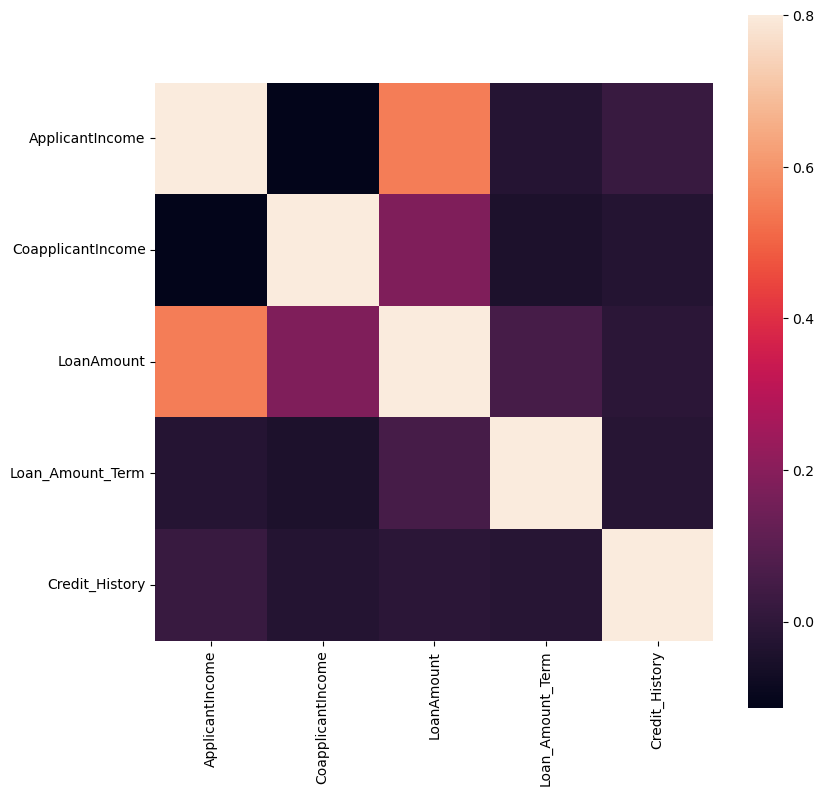

In [18]:

corrmat=data.corr()
f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(corrmat,vmax=.8,square=True)

<AxesSubplot:xlabel='ApplicantIncome'>

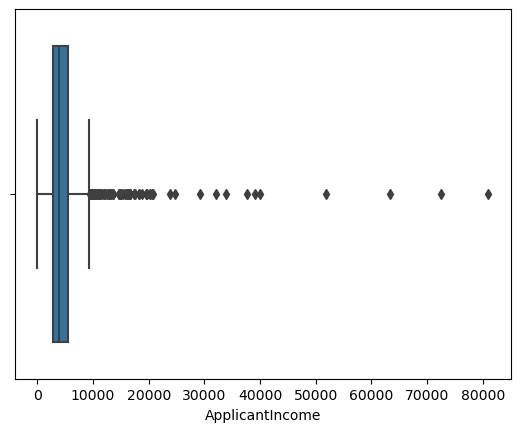

In [19]:
sns.boxplot(x=data.ApplicantIncome)

## Label ENcode

In [20]:

## Encodage des étiquettes pour le sexe
data.Gender=data.Gender.map({'Male':1,'Female':0})
data.Gender.value_counts()

1.0    775
0.0    182
Name: Gender, dtype: int64

<AxesSubplot:>

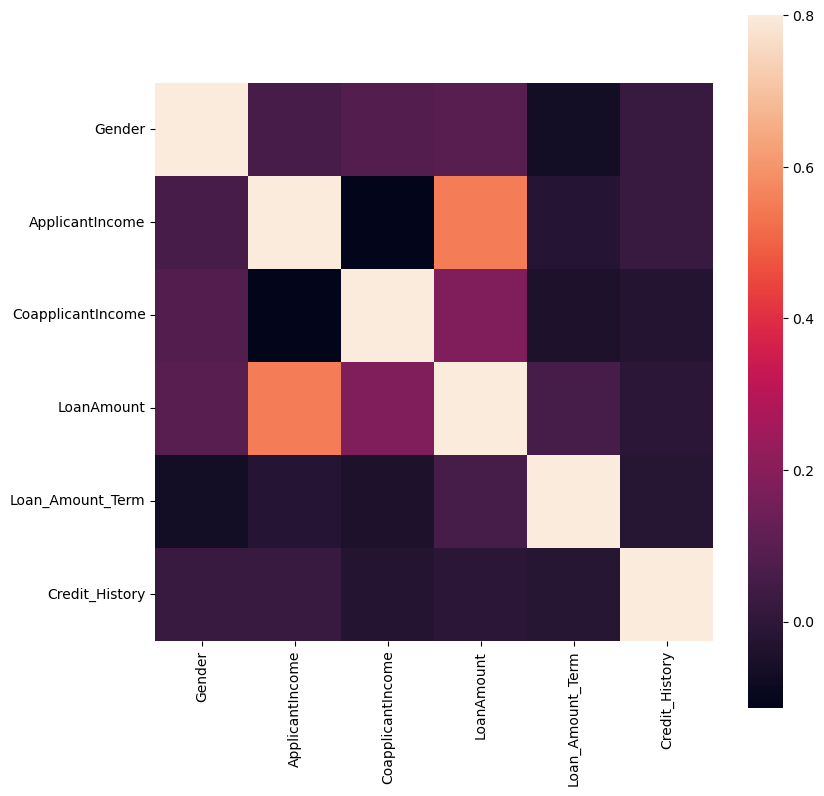

In [21]:

## Voyons les corrélations
corrmat=data.corr()
f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(corrmat,vmax=.8,square=True)

In [22]:

## Étiquetage 0 et 1 pour l'état civil
data.Married=data.Married.map({'Yes':1,'No':0})

In [23]:
data.Married.value_counts()

1.0    631
0.0    347
Name: Married, dtype: int64

In [24]:

## Étiquetage 0 et 1 pour les personnes à charge
data.Dependents=data.Dependents.map({'0':0,'1':1,'2':2,'3+':3})

In [25]:
data.Dependents.value_counts()

0.0    545
1.0    160
2.0    160
3.0     91
Name: Dependents, dtype: int64

<AxesSubplot:>

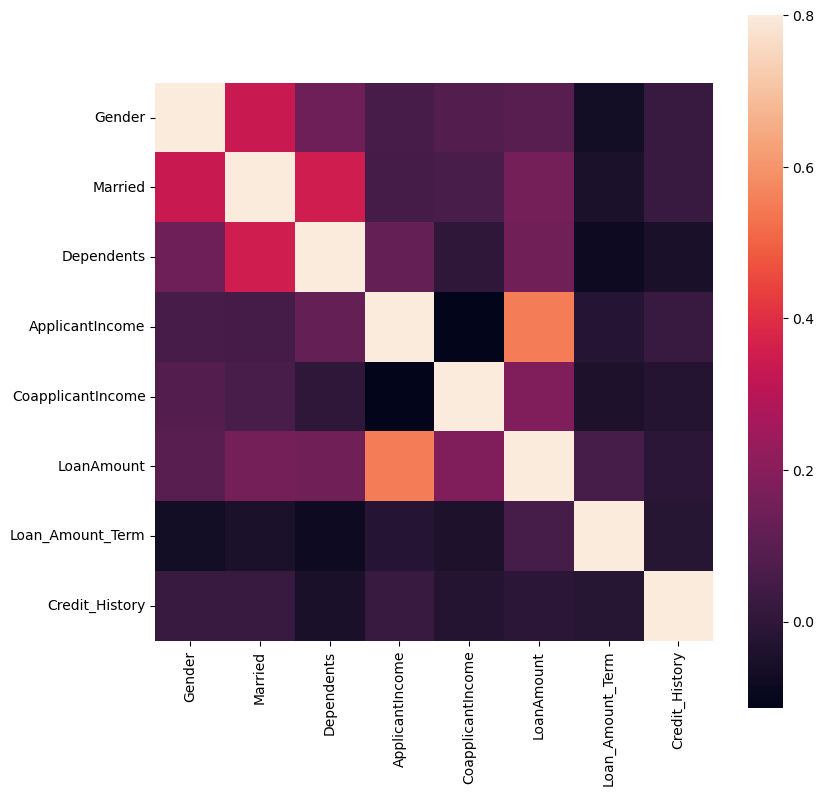

In [26]:

## Voyons les corrélations pour cela
corrmat=data.corr()
f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(corrmat,vmax=.8,square=True)

In [27]:

## Étiquetage 0 et 1 pour le statut de scolarité
data.Education=data.Education.map({'Graduate':1,'Not Graduate':0})

In [28]:
data.Education.value_counts()

1    763
0    218
Name: Education, dtype: int64

In [29]:

## Étiquetage 0 et 1 pour le statut d'emploi
data.Self_Employed=data.Self_Employed.map({'Yes':1,'No':0})

In [30]:
data.Self_Employed.value_counts()

0.0    807
1.0    119
Name: Self_Employed, dtype: int64

In [31]:
data.Property_Area.value_counts()

Semiurban    349
Urban        342
Rural        290
Name: Property_Area, dtype: int64

In [32]:

## Étiquetage 0 et 1 pour la zone de propriété 
data.Property_Area=data.Property_Area.map({'Urban':2,'Rural':0,'Semiurban':1})

In [33]:
data.Property_Area.value_counts()

1    349
2    342
0    290
Name: Property_Area, dtype: int64

<AxesSubplot:>

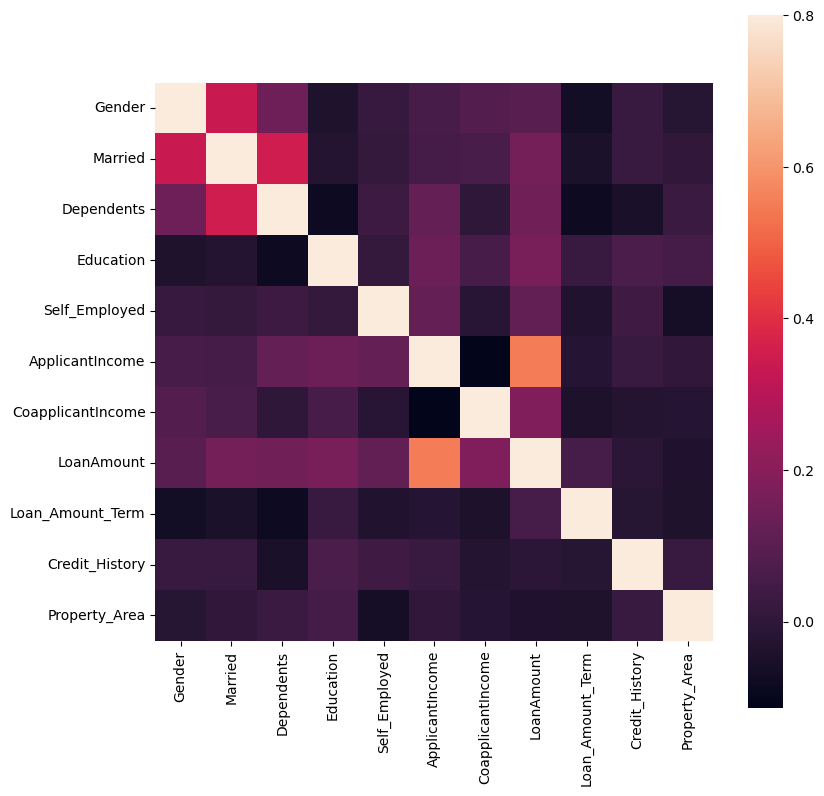

In [34]:
corrmat=data.corr()
f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(corrmat,vmax=.8,square=True)

In [35]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,2
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2


In [36]:
data.Credit_History.size

981

## It's time to fill the missing values

In [37]:
data.Credit_History.fillna(np.random.randint(0,2),inplace=True)

In [38]:
data.isnull().sum()

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History        0
Property_Area         0
dtype: int64

In [39]:
data.Married.fillna(np.random.randint(0,2),inplace=True)

In [40]:
data.isnull().sum()

Loan_ID               0
Gender               24
Married               0
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History        0
Property_Area         0
dtype: int64

In [41]:

## Remplissage avec la médiane 
data.LoanAmount.fillna(data.LoanAmount.median(),inplace=True)

In [42]:

## Remplissage avec la moyenne 
data.Loan_Amount_Term.fillna(data.Loan_Amount_Term.mean(),inplace=True)

In [43]:
data.isnull().sum()

Loan_ID               0
Gender               24
Married               0
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
dtype: int64

In [44]:
data.Gender.value_counts()

1.0    775
0.0    182
Name: Gender, dtype: int64

In [45]:

## Remplissage du sexe avec un nombre aléatoire entre 0 et 2
from random import randint 
data.Gender.fillna(np.random.randint(0,2),inplace=True)

In [46]:
data.Gender.value_counts()

1.0    775
0.0    206
Name: Gender, dtype: int64

In [47]:

## Remplir les personnes à charge avec la médiane 

data.Dependents.fillna(data.Dependents.median(),inplace=True)

In [48]:
data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
dtype: int64

<AxesSubplot:>

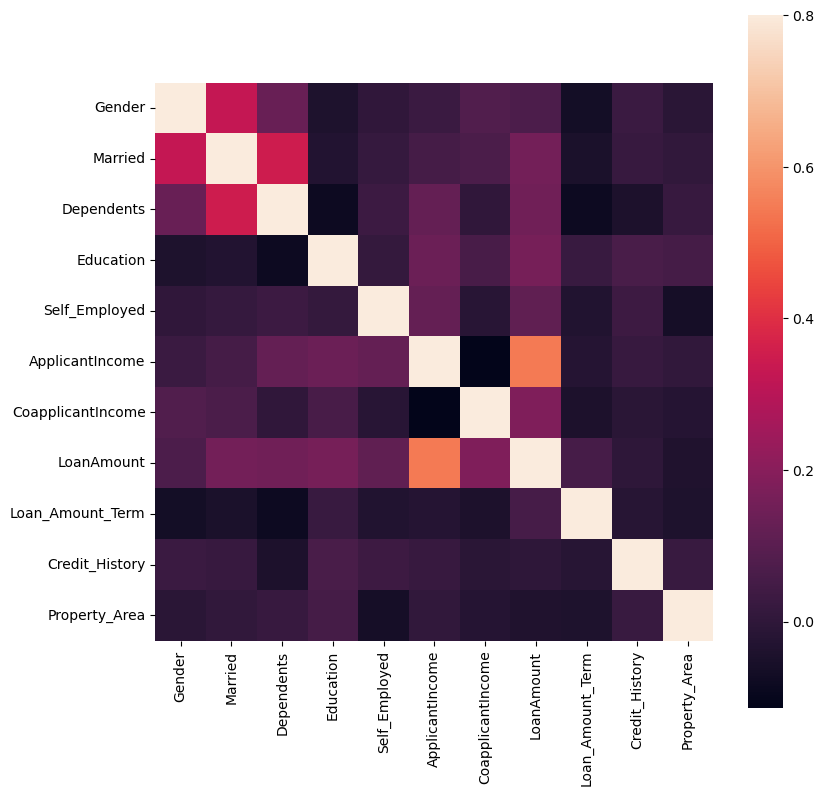

In [49]:
corrmat=data.corr()
f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(corrmat,vmax=.8,square=True)

In [50]:
data.Self_Employed.fillna(np.random.randint(0,2),inplace=True)

In [51]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [52]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,126.0,360.0,1.0,2
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2


In [53]:

## Supprimer l'ID de prêt des données, ce n'est pas utile
data.drop('Loan_ID',inplace=True,axis=1)

In [54]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [55]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0.0,1,0.0,5849,0.0,126.0,360.0,1.0,2
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2


## Split the Data into X & Y

In [56]:
train_X=data.iloc[:614,] 
## toutes les données dans X (Ensemble de trains) 
train_y=Loan_status  
## Le statut du prêt sera notre Y #

In [57]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(train_X,train_y,random_state=0)

In [58]:
test_X.shape

(154, 11)

In [59]:

 #sc_f = ['ApplicantIncome','CoapplicantIncome','LoanAmount ','Montant_prêt_Terme']
#sc_f = ['CandidatRevenu','CoapplicantRevenu','LoanAmount']# train_X.head()
train_X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
46,1.0,1.0,1.0,1,0.0,5649,0.0,44.0,360.0,1.0,2
272,1.0,0.0,0.0,1,0.0,2833,1857.0,126.0,360.0,1.0,0
474,1.0,0.0,2.0,1,0.0,5532,4648.0,162.0,360.0,1.0,0
382,0.0,0.0,0.0,1,0.0,6000,0.0,156.0,360.0,1.0,2
283,0.0,0.0,0.0,1,0.0,1811,1666.0,54.0,360.0,1.0,2


In [60]:
# train_X.head()

In [61]:
test_X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
454,1.0,0.0,0.0,1,1.0,7085,0.0,84.0,360.0,1.0,1
52,0.0,0.0,0.0,1,0.0,4230,0.0,112.0,360.0,1.0,1
536,1.0,1.0,0.0,1,0.0,6133,3906.0,324.0,360.0,1.0,2
469,1.0,1.0,0.0,1,0.0,4333,2451.0,110.0,360.0,1.0,2
55,1.0,1.0,2.0,1,0.0,2708,1167.0,97.0,360.0,1.0,1


# Entrainons les modeles Model

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

## Selectionner les Modeles ML

In [63]:
models=[]
models.append(("Logistic Regression",LogisticRegression()))
models.append(("Decision Tree",DecisionTreeClassifier()))
models.append(("Linear Discriminant Analysis",LinearDiscriminantAnalysis()))
models.append(("Random Forest",RandomForestClassifier()))
models.append(("Support Vector Classifier",SVC()))
models.append(("K- Neirest Neighbour",KNeighborsClassifier()))
models.append(("Naive Bayes",GaussianNB()))

In [64]:
scoring='accuracy'

In [65]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
result=[]
names=[]

In [66]:
for name,model in models:
    kfold=KFold(n_splits=10)
    #random_state=0
    cv_result=cross_val_score(model,train_X,train_y,cv=kfold,scoring=scoring)
    result.append(cv_result)
    names.append(name)
    print(model)
    print("%s %f" % (name,cv_result.mean()))
    #La définition d'un random_state n'a aucun effet puisque shuffle est False. Vous devez laisser random_state sa valeur par défaut (Aucun) ou définir shuffle=True

C:\Users\HOME\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HOME\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

LogisticRegression()
Logistic Regression 0.800000
DecisionTreeClassifier()
Decision Tree 0.669565
LinearDiscriminantAnalysis()
Linear Discriminant Analysis 0.802174
RandomForestClassifier()
Random Forest 0.791304
SVC()
Support Vector Classifier 0.673913
KNeighborsClassifier()
K- Neirest Neighbour 0.647826
GaussianNB()
Naive Bayes 0.795652


C:\Users\HOME\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\HOME\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

In [67]:
## Encodage des étiquettes pour le sexe## Voyons les corrélations## Étiquetage 0 et 1 pour l'état civil## Étiquetage 0 et 1 pour les personnes à charge## Voyons les corrélations pour cela## Étiquetage 0 et 1 pour le statut de scolarité## Étiquetage 0 et 1 pour le statut d'emploi## Étiquetage 0 et 1 pour la zone de propriété ## Remplissage avec la médiane ## Remplissage avec la moyenne ## Remplissage du sexe avec un nombre aléatoire entre 0 et 2
## Remplir les personnes à charge avec la médiane ## Supprimer l'ID de prêt des données, ce n'est pas utile ## toutes les données dans X (Ensemble de trains) ## Le statut du prêt sera notre Y #sc_f = ['ApplicantIncome','CoapplicantIncome','LoanAmount ','Montant_prêt_Terme']
#sc_f = ['CandidatRevenu','CoapplicantRevenu','LoanAmount']# train_X.head()

In [68]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

LR=LogisticRegression()
LR.fit(train_X,train_y)
pred=LR.predict(test_X)
print("Model Accuracy:- ",accuracy_score(test_y,pred))
print(confusion_matrix(test_y,pred))
print(classification_report(test_y,pred))
print(LR.coef_)
print(LR.intercept_)

Model Accuracy:-  0.8376623376623377
[[ 20  23]
 [  2 109]]
              precision    recall  f1-score   support

           0       0.91      0.47      0.62        43
           1       0.83      0.98      0.90       111

    accuracy                           0.84       154
   macro avg       0.87      0.72      0.76       154
weighted avg       0.85      0.84      0.82       154

[[ 9.79484892e-02  3.16643292e-01 -6.46023503e-02  6.17931272e-01
   3.72353164e-02 -2.92031305e-07 -8.17195291e-05 -1.42593370e-03
  -6.11710287e-03  2.70096600e+00  1.28911602e-01]]
[0.13102336]


On peut constater que le modele fait plus d'erreur de type II  (en prédisant qu'un bon payeur est un mauvais payeur) que de type I ( en prédisant qu'un mauvais payeur est un bon payeur).Ce qui n'est pas mal pour nos prédiction .Notre futurs travail est d'utilisé d'autres modele comme le XGboost pour réduire l'erreur de type II .

In [69]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

LC=LinearDiscriminantAnalysis()
LC.fit(train_X,train_y)
pred=LC.predict(test_X)
print("Model Accuracy:- ",accuracy_score(test_y,pred))
print(confusion_matrix(test_y,pred))
print(classification_report(test_y,pred))
print(LC.coef_)
print(LC.intercept_)

Model Accuracy:-  0.8376623376623377
[[ 20  23]
 [  2 109]]
              precision    recall  f1-score   support

           0       0.91      0.47      0.62        43
           1       0.83      0.98      0.90       111

    accuracy                           0.84       154
   macro avg       0.87      0.72      0.76       154
weighted avg       0.85      0.84      0.82       154

[[ 6.69609401e-02  2.70473316e-01  1.25172459e-01  5.91692573e-01
  -9.04281835e-02  9.24516330e-06 -8.33353392e-05 -1.39027157e-03
  -6.32797126e-04  4.62112429e+00  1.23921219e-01]]
[-3.25552585]


Model Accuracy:-  0.7142857142857143
[[24 19]
 [25 86]]
              precision    recall  f1-score   support

           0       0.49      0.56      0.52        43
           1       0.82      0.77      0.80       111

    accuracy                           0.71       154
   macro avg       0.65      0.67      0.66       154
weighted avg       0.73      0.71      0.72       154



[Text(0.1730263157894737, 0.975, 'X[9] <= 0.5\ngini = 0.438\nsamples = 460\nvalue = [149, 311]'),
 Text(0.06315789473684211, 0.925, 'X[7] <= 547.5\ngini = 0.136\nsamples = 68\nvalue = [63, 5]'),
 Text(0.05263157894736842, 0.875, 'X[7] <= 159.0\ngini = 0.112\nsamples = 67\nvalue = [63, 4]'),
 Text(0.021052631578947368, 0.825, 'X[5] <= 4836.0\ngini = 0.039\nsamples = 50\nvalue = [49, 1]'),
 Text(0.010526315789473684, 0.775, 'gini = 0.0\nsamples = 38\nvalue = [38, 0]'),
 Text(0.031578947368421054, 0.775, 'X[5] <= 4931.0\ngini = 0.153\nsamples = 12\nvalue = [11, 1]'),
 Text(0.021052631578947368, 0.725, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.042105263157894736, 0.725, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(0.08421052631578947, 0.825, 'X[7] <= 173.0\ngini = 0.291\nsamples = 17\nvalue = [14, 3]'),
 Text(0.07368421052631578, 0.775, 'X[6] <= 1440.5\ngini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(0.06315789473684211, 0.725, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),

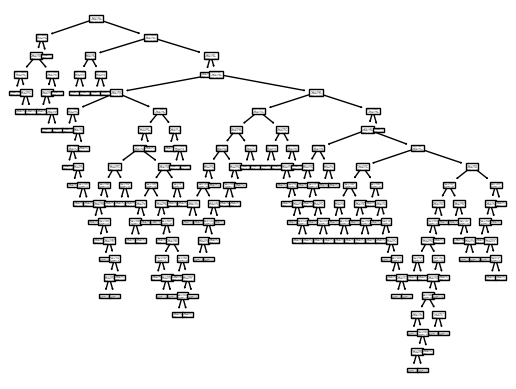

In [70]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

LD=DecisionTreeClassifier()
LD.fit(train_X,train_y)
pred=LD.predict(test_X)
print("Model Accuracy:- ",accuracy_score(test_y,pred))
print(confusion_matrix(test_y,pred))
print(classification_report(test_y,pred))
tree.plot_tree(LD)



In [71]:
print(pred)

[0 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1 0 0 1 0 1 1 1 0 1
 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 0
 1 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0
 1 1 1 0 0 0 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0
 0 0 1 1 1 0]


In [72]:
X_test=data.iloc[614:,] 
#X_test[sc_f]=SC.fit_transform(X_test[sc_f])

In [73]:
X_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,1.0,0.0,1,0.0,5720,0.0,110.0,360.0,1.0,2
1,1.0,1.0,1.0,1,0.0,3076,1500.0,126.0,360.0,1.0,2
2,1.0,1.0,2.0,1,0.0,5000,1800.0,208.0,360.0,1.0,2
3,1.0,1.0,2.0,1,0.0,2340,2546.0,100.0,360.0,1.0,2
4,1.0,0.0,0.0,0,0.0,3276,0.0,78.0,360.0,1.0,2


In [74]:
prediction = LR.predict(X_test)

In [75]:
print(prediction)

[1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


In [76]:
## Entrer nous meme
t = LR.predict([[0.0,	0.0,	0.0,	1,	0.0,	1811,	1666.0,	54.0,	360.0,	1.0,	2]])

C:\Users\HOME\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [77]:
print(t)

[1]


In [78]:
#Sérialisation (alt .json)
import pickle

In [79]:
import pickle

file = './Model/ML_Model.pkl'
#with open(file, 'wb') as f:
 #   pickle.dump(SVC, f)

Nous allons maintenant utiliser notre ML_Model.pkl dans notre demo Streamlit

In [80]:
#with open(file, 'rb') as f:
#    k = pickle.load(f)

In [81]:
#cy = k.predict([[0.0,	0.0,	0.0,	1,	0.0,	4230,	0.0,	112.0,	360.0,	1.0,	1]])
#print(cy)

In [84]:
#pip install lime
import lime
from lime import lime_tabular

# Création de l'explainer
X_train=train_X
explainer = lime_tabular.LimeTabularExplainer(X_train.values, 
                                              feature_names=X_train.columns.values.tolist(), 
                                              class_names=['0','1'], 
                                              verbose=True, 
                                              mode='classification')

# Choisissez un exemple spécifique à expliquer
i = 63
exp = explainer.explain_instance(X_test.values[i], ml.predict_proba, num_features=5)

# Afficher l'explication
exp.show_in_notebook(show_table=True)
#https://www.statcan.gc.ca/fr/science-donnees/reseau/apprentissage-explicable
#https://cedric.cnam.fr/vertigo/cours/RCP211/RCP211_TP4_Explicabilit%C3%A9.html
#

Intercept 0.08594182092127943
Prediction_local [-0.01752283]
Right: 0.0036779917


In [ ]:
data.describe()

In [83]:
from xgboost import XGBClassifier
ml=XGBClassifier()
ml.fit(train_X,train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [85]:
import shap
# Initialisation du Javascript
shap.initjs()

# Création de l'explainer
explainer = shap.TreeExplainer(ml)

# Calcul des valeurs SHAP pour les instances de test
shap_values = explainer.shap_values(X_test)

# Choisissez un exemple spécifique à expliquer
# vous pouvez choisir l'indice de l'exemple que vous souhaitez expliquer
shap.force_plot(explainer.expected_value, shap_values[i,:], X_test.iloc[i,:])


Variable Importance Plot - Global Interpretation


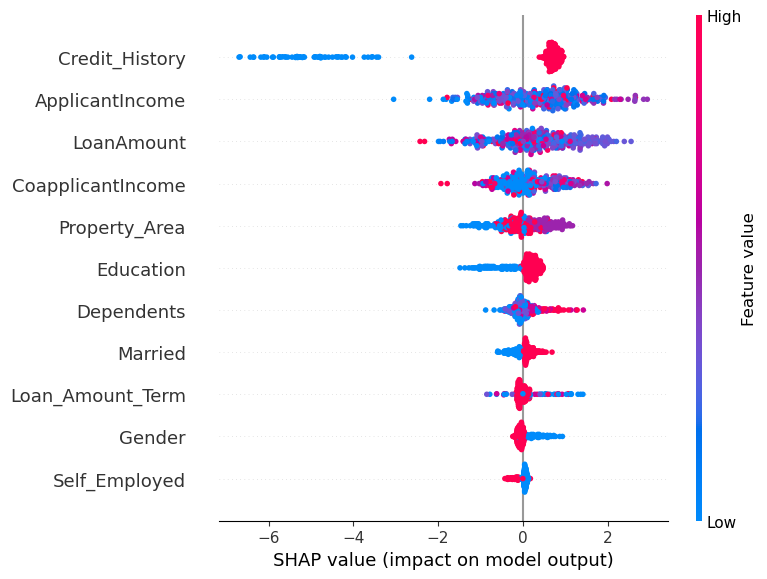

In [86]:
print("Variable Importance Plot - Global Interpretation")
figure = plt.figure()
shap.summary_plot(shap_values, X_test)

In [87]:
shap_values[i,:]

array([ 0.19357015, -0.22370052, -0.2276049 ,  0.03917376,  0.02249019,
       -0.10718445,  0.00805125, -0.19804086,  0.04250873, -5.5911975 ,
       -0.41147232], dtype=float32)

In [88]:
variables = [
    "Gender",
    "Married",
    "Dependents",
    "Education",
    "Self_Employed",
    "ApplicantIncome",
    "CoapplicantIncome",
    "LoanAmount",
    "Loan_Amount_Term",
    "Credit_History",
    "Property_Area"
]

A=shap_values[i,:]
a=np.sum(abs(A))
print("0")
for o,variable in enumerate(variables):
    p=A[o]/a*100
    if p <0:
        print(variable, ":",abs(p) ,"%" )
print("1")
for o,variable in enumerate(variables):
    p=A[o]/a*100
    if p >0:
        print(variable, ":",abs(p) ,"%" )
                
a

0
Married : 3.166322410106659 %
Dependents : 3.2215863466262817 %
ApplicantIncome : 1.5171200968325138 %
LoanAmount : 2.8031282126903534 %
Credit_History : 79.13944125175476 %
Property_Area : 5.824099481105804 %
1
Gender : 2.739848382771015 %
Education : 0.5544768180698156 %
Self_Employed : 0.3183326916769147 %
CoapplicantIncome : 0.11395979672670364 %
Loan_Amount_Term : 0.6016809493303299 %


7.064995

In [89]:
#X_test.loc[i,:]

In [90]:
# Exemple de client pour la prédiction
client_data = pd.DataFrame({
    'Gender': [1],
    'Married': [0],
    'Dependents': [0],
    'Education': [1],
    'Self_Employed': [0],
    'ApplicantIncome': [5000],
    'CoapplicantIncome': [0],
    'LoanAmount': [200],
    'Loan_Amount_Term': [360],
    'Credit_History': [1],
    'Property_Area': [2]
})

# Prédiction de la probabilité d'accord de crédit
prob_credit_approval = ml.predict_proba(client_data)[:, 1]
print("Probabilité d'accord de crédit :", prob_credit_approval)
client_data


Probabilité d'accord de crédit : [0.72723377]


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,5000,0,200,360,1,2


In [91]:
row = X_test.loc[[i],:]
prob_credit_approval = ml.predict_proba(row)[:, 0]  
prob_credit_approval
row

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
63,0.0,0.0,0.0,1,0.0,2101,1500.0,108.0,360.0,0.0,0


In [ ]:
import numpy as np
from scipy.optimize import minimize,basinhopping
import shap
from sklearn.ensemble import RandomForestClassifier
from scipy.optimize import milp
i=7
client = X_test.loc[[i],:]
#important_feature = ['Credit_History' ,'ApplicantIncome','CoapplicantIncome']
important_feature = ['LoanAmount']
def objective(feature_values):
    client_temp = client.copy()
    client_temp.loc[:, important_feature] = feature_values
    print("Client temporaire mis à jour :", client_temp)  # Débogage
    prob_credit_approval =  ml.predict_proba(client_temp)[:, 0]  # Probabilité de la classe 1 (accord de crédit)
    print (prob_credit_approval)
    return prob_credit_approval  # Nous voulons maximiser, donc nous minimisons l'opposé

initial_guess = client[important_feature].values.flatten()

# Contraintes (par exemple, les valeurs des caractéristiques doivent rester dans des limites réalistes)
import numpy as np
a=np.arange(0, 10000,100)
b=np.arange(0, 50000,1000)
c=np.arange(0,4 )
bounds = [
    (1000, 10000),  # ApplicantIncome
    (50, 500),      # LoanAmount
    (0, 1)          # Credit_History (binaire)
]

# Optimisation
results = minimize(objective, initial_guess, method='Nelder-Mead')

# Optimisation
#result = basinhopping(objective, initial_guess)

print(results.fun)
optimal_feature_value = results.x

print("Valeurs optimales des caractéristiques importantes :", optimal_feature_value)
# Analyse du résultat
if results.success:
    print(f"Pour obtenir l'accord de crédit, vous pourriez essayer :")
    print(f"- {important_feature[0] }: {optimal_feature_value[0]:.2f} ")
    #print(f"- {important_feature[1] } : {optimal_feature_value[1]:.2f} ")
    #print(f"- {important_feature[2] } : {optimal_feature_value[2]:.2f}")
else:
    print("L'optimisation n'a pas réussi à trouver une solution.")

#COBYLA,Powell

In [ ]:
import numpy as np
from scipy.optimize import minimize,basinhopping
import shap
from sklearn.ensemble import RandomForestClassifier
from scipy.optimize import milp
# Supposons que vous avez déjà un modèle entraîné et les données d'entrée X et y
# model = RandomForestClassifier().fit(X, y)
i=25
# Exemple de client
#client = np.array([[21, 45, 1, 4, 10, 12, 340]])  # Exemple des valeurs des caractéristiques
client = X_test.loc[[i],:]

# Calcul des valeurs SHAP pour ce client


# Identifier les trois caractéristiques les plus importantes (âge, durée, classe)
#important_features = [5, 2, 9]  # Indices des caractéristiques importantes (âge, durée, classe)
important_feature = ['Credit_History' ,'ApplicantIncome','CoapplicantIncome']
# Fonction objectif pour maximiser la probabilité d'accord de crédit

    
    
    
    
def objective(feature_values):
    client_temp = client.copy()
    client_temp.loc[:, important_feature] = feature_values
    #print("Client temporaire mis à jour :", client_temp)  # Débogage
    prob_credit_approval =  ml.predict_proba(client_temp)[:, 1]  # Probabilité de la classe 1 (accord de crédit)
    #print (-prob_credit_approval)
    return -prob_credit_approval  # Nous voulons maximiser, donc nous minimisons l'opposé

# Initial guess pour les caractéristiques importantes (âge, durée, classe)
#initial_guess = client[:, important_features].flatten()

# Utilisez .loc pour sélectionner les colonnes importantes et convertissez en tableau Numpy
initial_guess = client[important_feature].values.flatten()

# Contraintes (par exemple, les valeurs des caractéristiques doivent rester dans des limites réalistes)
import numpy as np
a=np.arange(0, 10000,100)
b=np.arange(0, 50000,1000)
c=np.arange(0,4 )

bounds = [
    (1000, 10000),  # ApplicantIncome
    (50, 500),      # LoanAmount
    (0, 1)          # Credit_History (binaire)
]

# Optimisation
results = minimize(objective, initial_guess, bounds=bounds, method='L-BFGS-B')

# Optimisation
result = basinhopping(objective, initial_guess)


# Résultats
optimal_feature_values = result.x
optimal_feature_value = results.x
print("Valeurs optimales des caractéristiques importantes :", optimal_feature_values)

# Analyse du résultat
if result.success:
    print(f"Pour obtenir l'accord de crédit, vous pourriez essayer :")
    print(f"- {important_feature[0] }: {optimal_feature_values[0]:.2f} ")
    print(f"- {important_feature[1] } : {optimal_feature_values[1]:.2f} ")
    print(f"- {important_feature[2] } : {optimal_feature_values[2]:.2f}")
else:
    print("L'optimisation n'a pas réussi à trouver une solution.")
# Analyse du résultat
if result.success:
    print(f"Pour obtenir l'accord de crédit, vous pourriez essayer :")
    print(f"- {important_feature[0] }: {optimal_feature_value[0]:.2f} ")
    print(f"- {important_feature[1] } : {optimal_feature_value[1]:.2f} ")
    print(f"- {important_feature[2] } : {optimal_feature_value[2]:.2f}")
else:
    print("L'optimisation n'a pas réussi à trouver une solution.")


In [ ]:
import numpy as np
from scipy.optimize import minimize,basinhopping,NonlinearConstraint
import shap
from sklearn.ensemble import RandomForestClassifier
from scipy.optimize import milp
# Supposons que vous avez déjà un modèle entraîné et les données d'entrée X et y
# model = RandomForestClassifier().fit(X, y)
i=25
# Exemple de client
#client = np.array([[21, 45, 1, 4, 10, 12, 340]])  # Exemple des valeurs des caractéristiques
client = X_test.loc[[i],:]

# Calcul des valeurs SHAP pour ce client


# Identifier les trois caractéristiques les plus importantes (âge, durée, classe)
#important_features = [5, 2, 9]  # Indices des caractéristiques importantes (âge, durée, classe)
important_feature = ['ApplicantIncome','LoanAmount']
# Fonction objectif pour maximiser la probabilité d'accord de crédit

def constraint_function(feature_values):
    client_temp = client.copy()
    client_temp.loc[:, important_feature] = feature_values
    prob_credit_approval = ml.predict_proba(client_temp)[:, 1]
    return prob_credit_approval + 0.5  # On veut que prob_credit_approval >= -0.5

# Définition de la contrainte d'inégalité
constraint = NonlinearConstraint(constraint_function, lb=-np.inf, ub=0)
   
    
    
    
def objective(feature_values):
    client_temp = client.copy()
    client_temp.loc[:, important_feature] = feature_values
    #print("Client temporaire mis à jour :", client_temp)  # Débogage
    prob_credit_approval =  ml.predict_proba(client_temp)[:, 1]  # Probabilité de la classe 1 (accord de crédit)
    #print (-prob_credit_approval)
    return -prob_credit_approval  # Nous voulons maximiser, donc nous minimisons l'opposé

# Initial guess pour les caractéristiques importantes (âge, durée, classe)
#initial_guess = client[:, important_features].flatten()

# Utilisez .loc pour sélectionner les colonnes importantes et convertissez en tableau Numpy
initial_guess = client[important_feature].values.flatten()

# Contraintes (par exemple, les valeurs des caractéristiques doivent rester dans des limites réalistes)
bounds = [
    (0, 10000),  # ApplicantIncome
    (50, 50000),      # LoanAmount
    #(0, 1)           Credit_History (binaire)
]
# Fonction de contrainte pour forcer prob_credit_approval <= -0.5

# Optimisation
resulds = minimize(objective , initial_guess,bounds=bounds, method='SLSQP', options={'eps': (1000,1000)})
resultds = minimize(objective, initial_guess, method='trust-constr', bounds=bounds, constraints=[constraint])
results = basinhopping(objective , initial_guess)
optimal_feature_value = results.x
print("Valeurs optimales des caractéristiques importantes :", optimal_feature_value)

# Analyse du résultat
if result.success:
    print(f"Pour obtenir l'accord de crédit, vous pourriez essayer :")
    print(f"- {important_feature[0] }: {optimal_feature_value[0]:.2f} ")
    print(f"- {important_feature[1] } : {optimal_feature_value[1]:.2f} ")
    #print(f"- {important_feature[2] } : {optimal_feature_value[2]:.2f}")
else:
    print("L'optimisation n'a pas réussi à trouver une solution.")


In [ ]:
data.describe()

In [ ]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Affichage de l'importance des caractéristiques
plot_importance(ml)
plt.show()


In [ ]:
# Graphique SHAP résumé pour l'interprétabilité globale
shap.summary_plot(shap_values, X_test)

In [ ]:

# Création de l'objet explainer
explainer = shap.TreeExplainer(ml)

# Calcul des valeurs SHAP
shap_values = explainer.shap_values(X_train)

# Tracer le graphique SHAP de synthèse
shap.summary_plot(shap_values, X_train, plot_type="bar")

# Afficher le graphique
plt.show()